In [1]:
#import libraries and magic words
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#define source directory
source_dir = 'source'

In [3]:
#load in the data
azdias_scaled = pd.read_csv(os.path.join(source_dir, 'azdias_scaled.csv'), index_col=0)
customers_scaled = pd.read_csv(os.path.join(source_dir, 'customers_scaled.csv'), index_col=0)

In [4]:
#display the data
display(azdias_scaled.head(), azdias_scaled.info(), azdias_scaled.describe())
display(customers_scaled.head(), customers_scaled.info(), customers_scaled.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785843 entries, 0 to 785842
Columns: 357 entries, AGER_TYP to ALTERSKATEGORIE_GROB
dtypes: float64(357)
memory usage: 2.1 GB


,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0.00,1.0,0.000000,0.84,0.018487,0.0,0.0,0.044444,0.026726,0.0,...,1.0,0.727273,0.846154,0.909091,0.500000,1.0,0.500,0.8,1.0,0.000
1,0.00,1.0,0.809524,0.68,0.016807,0.0,0.0,0.022222,0.015590,0.0,...,0.5,0.818182,0.692308,0.545455,0.500000,1.0,0.250,0.8,1.0,0.250
2,0.75,0.0,0.619048,0.52,0.001681,0.0,0.0,0.000000,0.004454,0.0,...,0.0,0.636364,0.769231,1.000000,0.000000,1.0,0.875,0.4,1.0,0.375
3,0.00,0.0,0.952381,0.56,0.005042,0.0,0.0,0.088889,0.006682,0.0,...,0.5,0.272727,0.384615,0.363636,0.333333,1.0,0.375,0.6,0.0,0.250
4,1.00,0.0,0.476190,0.40,0.008403,0.0,0.0,0.022222,0.004454,0.0,...,0.5,0.909091,0.538462,0.363636,1.000000,1.0,0.875,0.6,1.0,0.000


None

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,785843.000000,785843.000000,785843.000000,785843.000000,785843.000000,785843.000000,785843.000000,785843.000000,785843.000000,785843.000000,...,785843.000000,785843.000000,785843.000000,785843.000000,785843.000000,785843.000000,785843.000000,785843.000000,785843.000000,785843.000000
mean,0.175128,0.425603,0.519216,0.422383,0.013936,0.001994,0.014062,0.038515,0.016916,0.001029,...,0.585086,0.543121,0.576684,0.537814,0.641963,0.866734,0.507171,0.476257,0.521595,0.227235
std,0.308195,0.454809,0.363151,0.291108,0.026116,0.015751,0.045782,0.025769,0.031642,0.017042,...,0.305559,0.261124,0.251818,0.253615,0.338345,0.237757,0.242717,0.281511,0.499534,0.135095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.001681,0.000000,0.000000,0.022222,0.002227,0.000000,...,0.250000,0.272727,0.384615,0.363636,0.333333,0.875000,0.375000,0.400000,0.000000,0.125000
50%,0.000000,0.250000,0.619048,0.520000,0.006723,0.000000,0.000000,0.022222,0.006682,0.000000,...,0.500000,0.545455,0.615385,0.545455,0.666667,1.000000,0.375000,0.400000,1.000000,0.250000
75%,0.500000,1.000000,0.809524,0.640000,0.016807,0.000000,0.000000,0.044444,0.020045,0.000000,...,0.750000,0.727273,0.769231,0.727273,1.000000,1.000000,0.625000,0.600000,1.000000,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 140414 entries, 0 to 140413
Columns: 360 entries, AGER_TYP to ALTERSKATEGORIE_GROB
dtypes: float64(360)
memory usage: 386.7 MB


,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0.75,0.0,0.476190,0.40,0.001912,0.0,0.0,0.095238,0.002667,0.0,...,0.181818,1.000000,1.0,0.875,0.4,1.0,1.0,0.0,0.0,0.375
1,0.00,0.0,0.285714,0.00,0.001912,0.0,0.0,0.047619,0.002667,0.0,...,1.000000,1.000000,1.0,0.250,0.4,1.0,1.0,0.0,1.0,0.375
2,0.50,0.0,0.380952,0.32,0.000000,0.0,0.0,0.000000,0.002667,0.0,...,0.181818,0.000000,1.0,0.875,0.0,0.0,1.0,0.0,0.0,0.375
3,0.00,0.0,0.952381,0.56,0.013384,0.0,0.0,0.190476,0.018667,0.0,...,0.363636,0.333333,1.0,0.375,0.0,0.5,1.0,0.0,0.0,0.250
4,0.50,0.0,0.523810,0.40,0.001912,0.0,0.0,0.095238,0.002667,0.0,...,0.090909,1.000000,1.0,0.125,0.2,1.0,1.0,0.0,0.0,0.250


None

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,140414.000000,140414.000000,140414.000000,140414.000000,140414.000000,140414.000000,140414.000000,140414.000000,140414.000000,140414.000000,...,140414.000000,140414.000000,140414.000000,140414.000000,140414.000000,140414.000000,140414.000000,140414.000000,140414.000000,140414.000000
mean,0.443102,0.091364,0.541289,0.398217,0.009343,0.003166,0.017008,0.108318,0.012331,0.004069,...,0.284476,0.671726,0.959096,0.465888,0.281925,0.658143,0.702416,0.086373,0.330466,0.312186
std,0.332698,0.243202,0.298593,0.179143,0.026371,0.024976,0.061618,0.066319,0.036403,0.030441,...,0.203194,0.346009,0.137911,0.261510,0.260621,0.405974,0.457197,0.280915,0.470382,0.095184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.380952,0.320000,0.001912,0.000000,0.000000,0.047619,0.002667,0.000000,...,0.090909,0.333333,1.000000,0.250000,0.000000,0.500000,0.000000,0.000000,0.000000,0.250000
50%,0.500000,0.000000,0.523810,0.400000,0.001912,0.000000,0.000000,0.095238,0.002667,0.000000,...,0.272727,0.666667,1.000000,0.375000,0.400000,1.000000,1.000000,0.000000,0.000000,0.375000
75%,0.750000,0.000000,0.761905,0.520000,0.007648,0.000000,0.000000,0.142857,0.008000,0.000000,...,0.363636,1.000000,1.000000,0.625000,0.400000,1.000000,1.000000,0.000000,1.000000,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Features Extraction by PCA
---------

In [5]:
#define and fit the data to PCA
pca = PCA(n_components=356, random_state=101)
azdias_fit_pca = pca.fit(azdias_scaled)

In [6]:
#define a function to calculate the number of components
def calculate_components(comp_variance, variance=0.9):
    '''
    This function is used to calculate the number of components,
    giving a desired total explained variance
    input: data explained variance ratio, expected variance
    output: number of components
    '''
    
    for i in range(comp_variance.shape[0]):
        
        explained_variance = comp_variance[:i+1].sum()
        
        if explained_variance > variance:
            break
    
    print('num_of_components: {} explained_variance: {}'.format(i+1, explained_variance))
    return i+1

In [7]:
#calculate the number of components
num_of_components = calculate_components(azdias_fit_pca.explained_variance_ratio_)

num_of_components: 142 explained_variance: 0.900449999183804


In [8]:
#display the weight of the components
def display_component(pca_components, features_list, component_num, n_weights=30):
    '''
    This function is used to display the weight of each features
    in a single particular component.
    input: data pca components, features list, # of particular component
    output: display a bar chart showing the weight distribution
    '''

    comp_row = pca_components[component_num-1]

    components = pd.DataFrame(list(zip(comp_row, features_list)), 
                         columns=['weights', 'features'])

    components['abs_weights'] = components['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = components.sort_values('abs_weights', ascending=False).head(n_weights)

    ax=plt.subplots(figsize=(10,10))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("PCA Component Makeup, Component #" + str(component_num))
    plt.show()

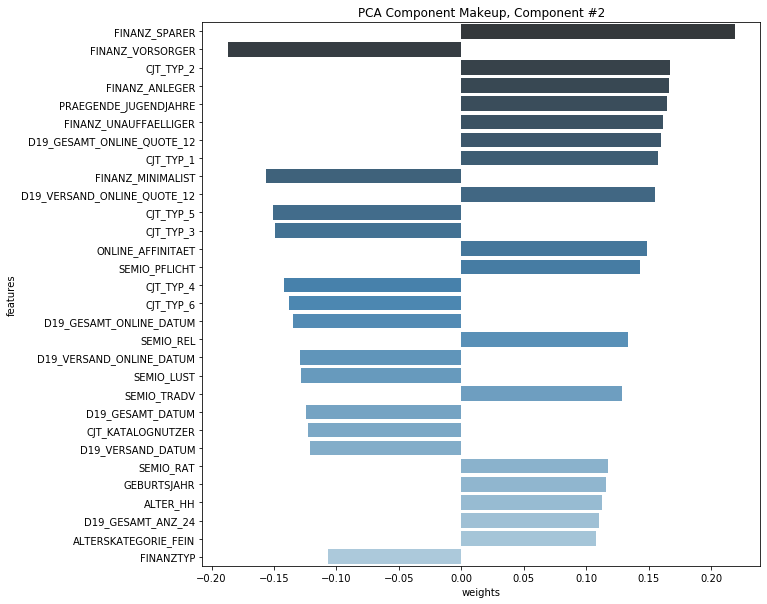

In [32]:
#display the weight distribution
display_component(azdias_fit_pca.components_, azdias_scaled.columns.values, 2)

In [10]:
#transform the data in PCA
azdias_train_pca = pca.fit_transform(azdias_scaled)

In [11]:
#save the data in DataFrame
azdias_transformed = pd.DataFrame(azdias_train_pca).iloc[:, :num_of_components]
azdias_transformed.columns = ['c_' + str(i+1) for i in range(num_of_components)]

In [12]:
azdias_transformed.head()

,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,...,c_133,c_134,c_135,c_136,c_137,c_138,c_139,c_140,c_141,c_142
0,-1.683048,1.325583,-1.189293,0.958548,-0.738127,-0.073816,0.274589,0.296433,-0.514717,0.587605,...,0.039142,0.252798,0.066557,-0.220075,-0.260756,-0.122988,-0.107328,0.025560,-0.035298,-0.182873
1,-0.211084,-0.096918,-1.057716,1.184524,-1.035440,-0.249482,0.742533,0.579028,-0.614712,-1.123844,...,-0.080269,-0.015327,-0.187248,-0.059524,0.155987,0.111191,0.014796,0.202840,0.037589,0.156827
2,0.799356,-1.821880,-0.687417,0.427627,-0.499573,-0.150658,-0.130262,0.188814,-1.026050,-0.212127,...,-0.108001,0.124025,-0.049117,0.158049,0.089274,0.212867,0.225160,0.173907,-0.015657,0.128120
3,1.880993,1.580932,1.604994,0.616510,1.095333,0.095137,-0.864923,-0.855606,-0.329526,0.636758,...,-0.044640,-0.081300,-0.064425,-0.136673,-0.020133,0.047841,0.197411,-0.038379,-0.178887,-0.201061
4,0.366533,-0.581459,-0.315805,0.371514,-0.182479,-0.041767,0.013120,-0.981780,-0.986708,-0.312875,...,-0.067284,0.137899,0.008943,-0.070746,0.251930,0.077969,-0.149814,-0.428751,-0.022271,0.352763


Population Segmentation by K-means
---

In [13]:
# #Calculate the optimized k
# scores = []
# # sil_scores = []
# clusters = range(2, 10)

# for k in clusters:
#     kmeans = KMeans(n_clusters=k, random_state=101, n_jobs=-1)
#     model = kmeans.fit(azdias_transformed)
#     scores.append(np.abs(model.score(azdias_transformed)))
# #     sil_scores.append(silhouette_score(azdias_transformed, model.labels_))

#     print('k: {}, calculating...'.format(k))

In [14]:
# #display the scores of different k
# plt.figure(figsize=(20,10))
# plt.plot(clusters, scores)
# plt.xlabel('k')
# plt.ylabel('score')
# plt.title('Kmeans scores')
# plt.show()

In [15]:
#define and input data to the k-means model
kmeans = KMeans(n_clusters=5, random_state=12, n_jobs=-1)
azdias_clusters = kmeans.fit_predict(azdias_transformed)

In [16]:
#transform the result to a pandas series
azdias_clusters = pd.Series(azdias_clusters)

In [17]:
#prepare the data
azdias_cluster_counts = pd.DataFrame(azdias_clusters.value_counts())
azdias_cluster_counts = azdias_cluster_counts.reset_index()
azdias_cluster_counts.columns = ['Cluster', 'Counts']
azdias_cluster_counts['Group'] = 'General Population'

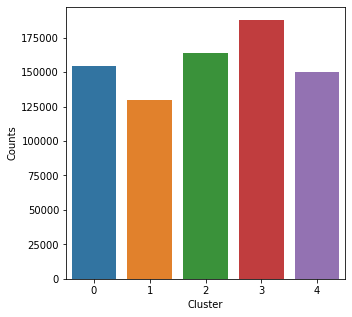

In [18]:
#show the data in a bar chart
plt.figure(figsize=(5,5))
sns.barplot(data=azdias_cluster_counts,
            x='Cluster',
            y='Counts')
plt.show()

In [19]:
#make both data to have same features
customers_scaled_drop = customers_scaled.drop(['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'], axis=1)

In [20]:
#transform the features of customer group
customers_train_pca = pca.transform(customers_scaled_drop)

In [21]:
#save the data in DataFrame
customers_transformed = pd.DataFrame(customers_train_pca).iloc[:, :num_of_components]
customers_transformed.columns = azdias_transformed.columns

In [22]:
customers_transformed.head()

,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,...,c_133,c_134,c_135,c_136,c_137,c_138,c_139,c_140,c_141,c_142
0,1.475857,-2.279349,-0.192197,0.831188,1.167716,0.002289,-0.387562,0.135309,-0.023850,-0.002540,...,0.254717,-0.048973,-0.191709,0.171019,-0.208243,-0.040013,-0.173206,0.240323,-0.484479,0.359052
1,-0.757597,-1.720097,1.185625,0.724538,-0.544146,-0.207789,-1.097518,0.462664,0.416530,0.455613,...,0.000151,0.051759,0.330068,0.038314,0.224294,-0.133851,0.052665,-0.127562,-0.038206,0.002550
2,0.939420,-1.891848,-0.256308,-0.268870,0.913025,0.057945,0.567414,-0.835987,-0.350234,0.355786,...,0.113984,0.030056,-0.116964,0.155021,-0.312537,-0.411213,-0.088523,-0.057958,0.164636,0.032644
3,1.417731,1.913956,1.355716,-0.216428,0.574096,-0.031926,-1.207788,-0.251305,-0.143472,0.276488,...,0.104161,0.122460,-0.087529,0.103839,0.252067,0.272995,0.181750,-0.154117,-0.687615,-0.008198
4,0.960674,-1.442484,1.117892,1.652379,1.100509,-0.162071,0.227292,0.479697,-0.312092,0.083724,...,-0.058313,0.218515,0.324946,-0.112346,0.036846,0.005594,-0.032227,0.061576,-0.080661,-0.130679


In [23]:
#input the customer data to previous kmeans model to make prediction
customers_clusters = kmeans.predict(customers_transformed)

In [24]:
#transform the result to pandas series
customers_clusters = pd.Series(customers_clusters)

In [25]:
#prepare the data
customers_cluster_counts = pd.DataFrame(customers_clusters.value_counts())
customers_cluster_counts = customers_cluster_counts.reset_index()
customers_cluster_counts.columns = ['Cluster', 'Counts']
customers_cluster_counts['Group'] = 'Customers'

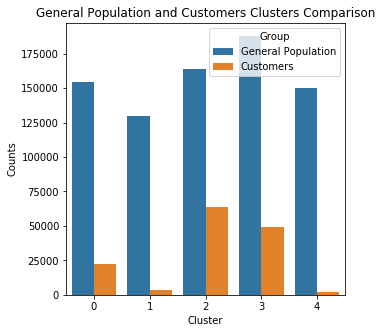

In [26]:
#show the data in a bar chart
plt.figure(figsize=(5,5))

sns.barplot(data=pd.concat([azdias_cluster_counts, customers_cluster_counts]),
            hue='Group',
            x='Cluster',
            y='Counts')
plt.title('General Population and Customers Clusters Comparison')
plt.show()

In [27]:
#save the cluster centers
attribute_centroids = pd.DataFrame(kmeans.cluster_centers_)
attribute_centroids.columns = azdias_transformed.columns

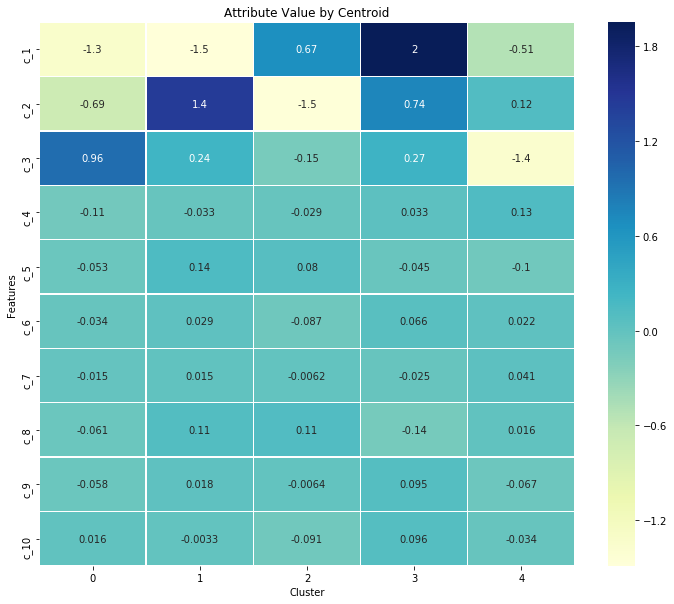

In [28]:
#show the cluster centers in a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(attribute_centroids.iloc[:,:10].T, cmap = 'YlGnBu', annot=True, linewidths=.5)
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.title('Attribute Value by Centroid')
plt.show()

In [29]:
#label the customers
customers_scaled['Label'] = customers_clusters

In [30]:
#show which group of the customers has a higher chance to purchase online
customers_scaled.groupby(['Label'])['ONLINE_PURCHASE'].value_counts()

Label  ONLINE_PURCHASE
0      0.0                21634
       1.0                  959
1      0.0                 2056
       1.0                 1195
2      0.0                61076
       1.0                 2505
3      0.0                41991
       1.0                 7129
4      0.0                 1529
       1.0                  340
Name: ONLINE_PURCHASE, dtype: int64

In [31]:
#show which group of the customers has a higher chance to buy multiple times
customers_scaled.groupby(['Label'])['CUSTOMER_GROUP'].value_counts()

Label  CUSTOMER_GROUP
0      1.0               16472
       0.0                6121
1      1.0                2013
       0.0                1238
2      1.0               47068
       0.0               16513
3      1.0               31839
       0.0               17281
4      1.0                1237
       0.0                 632
Name: CUSTOMER_GROUP, dtype: int64